# **Logistic Regression**

Logistic Regression is a fundamental and powerful supervised machine learning algorithm used for classification tasks. Despite the word "regression" in its name, it is primarily used to estimate the probability that an instance belongs to a particular class (e.g., whether a patient has a disease or not).

# 1. Data Exploration:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing all the necessary libraries

In [7]:
#load the data set
df=pd.read_csv('/content/drive/MyDrive/Python excelr/diabetes.csv.xls')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df.isnull().sum() #checking missing values

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


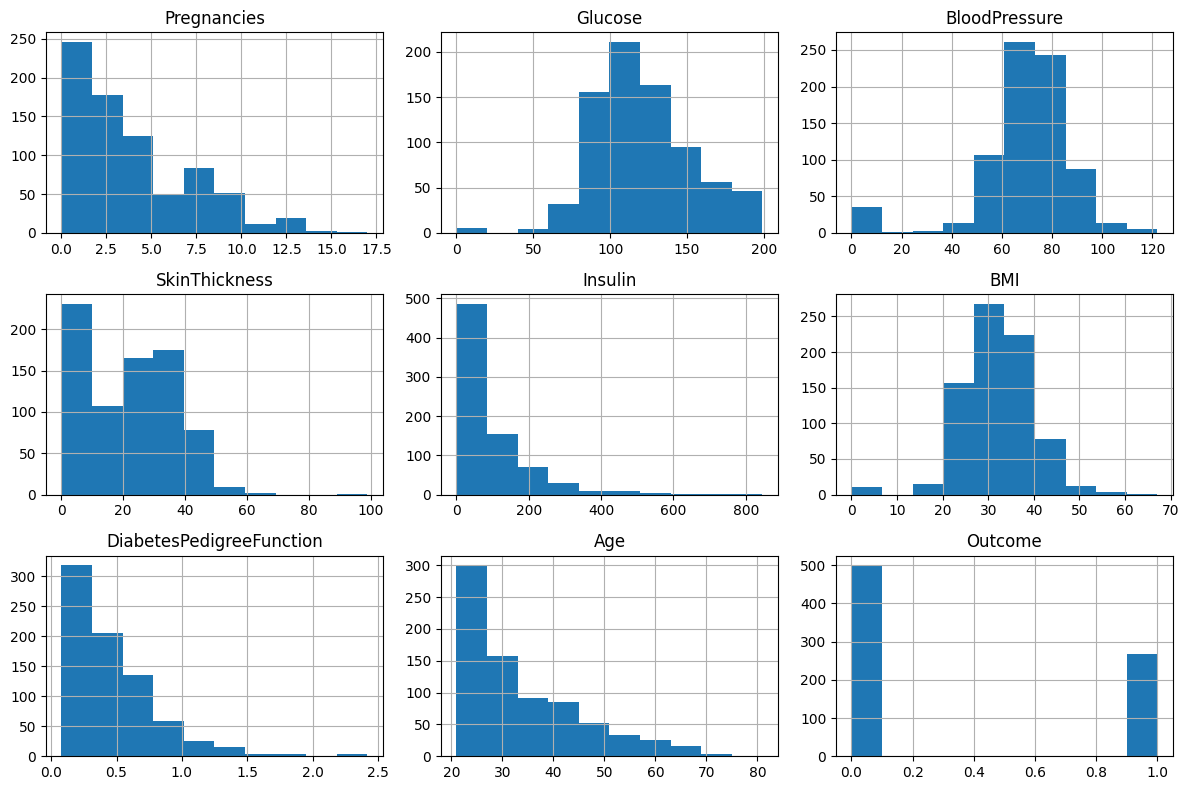

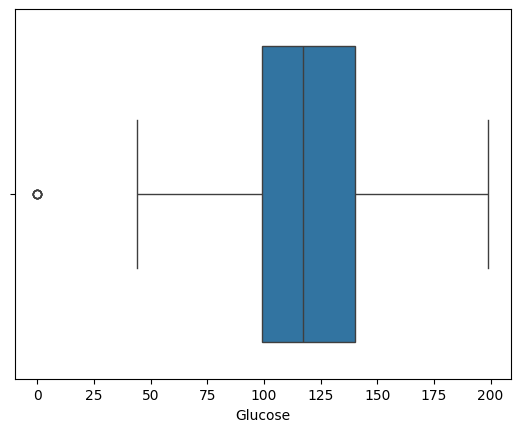

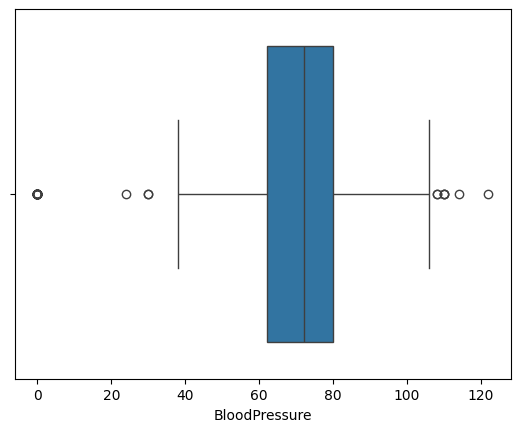

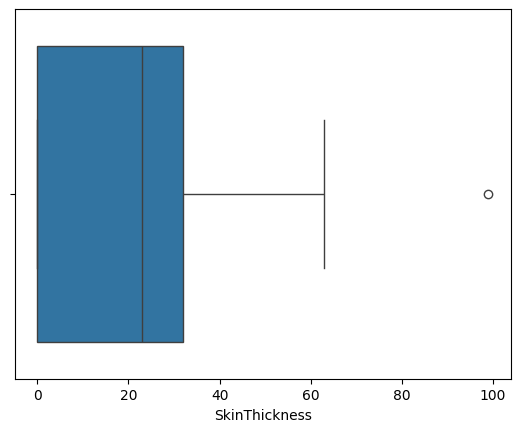

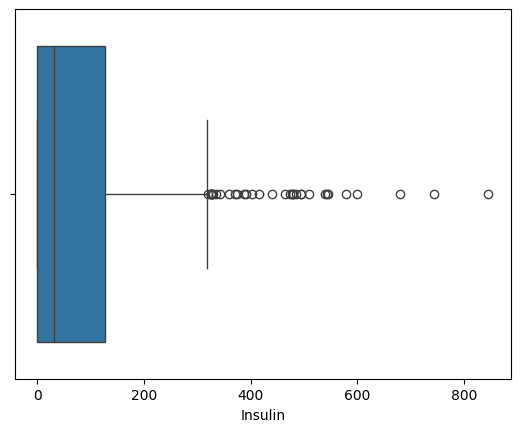

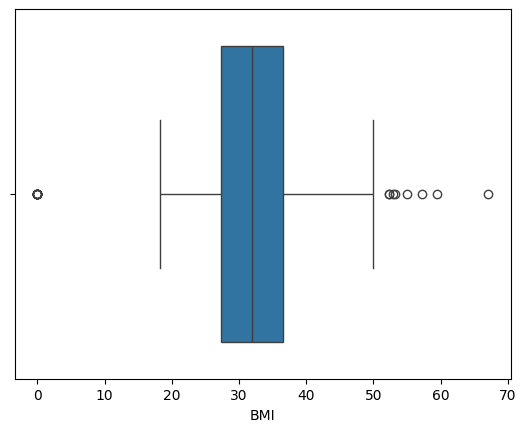

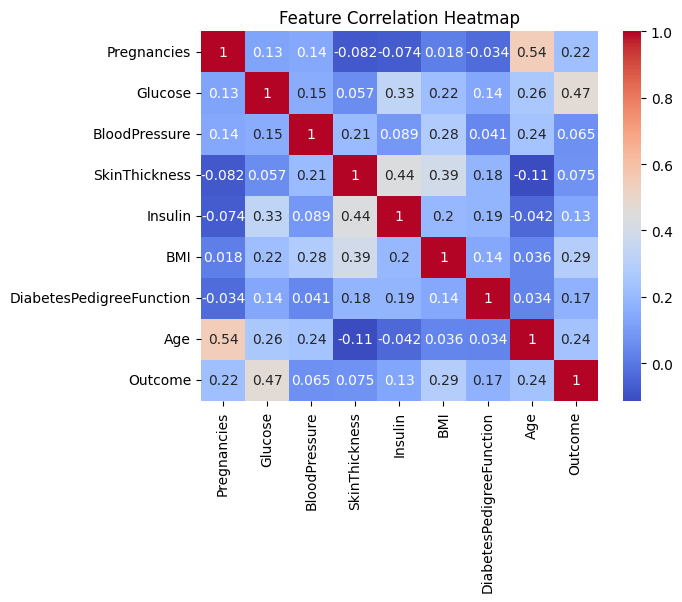

In [15]:
#Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
# Histogram
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Boxplots for outliers
for col in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    sns.boxplot(data=df, x=col)
    plt.show()

# Correlation Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# 2. Data Preprocessing:

a. Handle missing values (e.g., imputation).
b. Encode categorical variables.

In [17]:
import numpy as np
cols_with_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in cols_with_zero:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].median(), inplace=True)


/tmp/ipython-input-2367269503.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [18]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Building:

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

# 4. Model Evaluation:

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.6181818181818182
F1 Score: 0.6415094339622641
ROC AUC: 0.8211202938475666


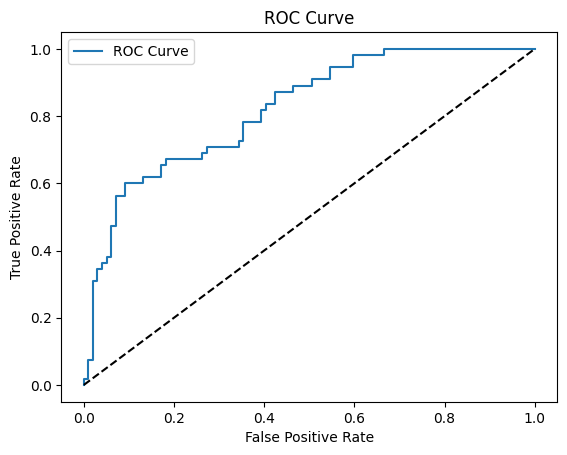

In [21]:
#Visualize the ROC curve.
fpr, tpr, thresholds = roc_curve(y_test, y_prob) #Calculates the False Positive Rate (FPR) and True Positive Rate (TPR) across all possible classification thresholds.
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 5. Interpretation:

                          Coefficient
DiabetesPedigreeFunction     0.553694
BMI                          0.101797
Pregnancies                  0.067629
Glucose                      0.037338
Age                          0.034603
SkinThickness                0.007714
Insulin                     -0.001669
BloodPressure               -0.013234


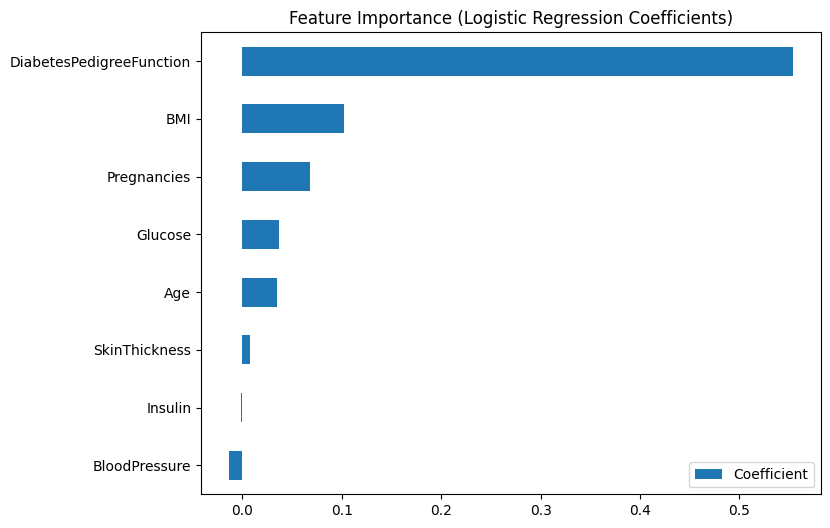

In [22]:
coeff = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
print(coeff.sort_values(by='Coefficient', ascending=False))
coeff.sort_values(by='Coefficient').plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()


here,the above ,Positive coefficient = increases diabetes risk;
Negative coefficient =decreases risk

# 6. Deployment with Streamlit:

In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions.

In [23]:
#we have to save the model
import pickle #Python's standard module for serializing and deserializing objects.
pickle.dump(model, open('diabetes_model.pkl', 'wb')) #Takes your trained model object  and writes its binary representation into the file object.

as we are not having the streamlit, we should first install it
we use a small workaround using ngrok (which creates a public link to your local Streamlit server), as direct streamlit does not work in colab

In [28]:
!pip install streamlit pyngrok

so we have successfully installed this .
but now we need ngrok token.\
for that we have to login into the website and get the token and paste in the code.\
the token is the key that allows your private, local app to safely and securely expose itself to the public internet via the ngrok service.\


In [37]:
from pyngrok import ngrok
ngrok.set_auth_token("33kxaqMMWNeNCkpzqTA5Uj101Ca_p89m6ebVTLVGzPPSEatn")


Create Streamlit app file

writefile app.py is used in environments like Jupyter or Colab to save the content of the entire cell immediately following it into a file name

In [38]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle

model = pickle.load(open('diabetes_model.pkl', 'rb'))

st.title("Diabetes Prediction App")

# User Inputs
Pregnancies = st.number_input("Number of Pregnancies", 0, 20, 1)
Glucose = st.number_input("Glucose Level", 0, 200, 100)
BloodPressure = st.number_input("Blood Pressure", 0, 130, 70)
SkinThickness = st.number_input("Skin Thickness", 0, 100, 20)
Insulin = st.number_input("Insulin Level", 0, 900, 80)
BMI = st.number_input("BMI", 0.0, 70.0, 25.0)
DiabetesPedigreeFunction = st.number_input("Diabetes Pedigree Function", 0.0, 2.5, 0.5)
Age = st.number_input("Age", 0, 120, 30)

data = pd.DataFrame({
    'Pregnancies':[Pregnancies],
    'Glucose':[Glucose],
    'BloodPressure':[BloodPressure],
    'SkinThickness':[SkinThickness],
    'Insulin':[Insulin],
    'BMI':[BMI],
    'DiabetesPedigreeFunction':[DiabetesPedigreeFunction],
    'Age':[Age]
})

if st.button("Predict"):
    result = model.predict(data)
    if result[0] == 1:
        st.error("High Risk of Diabetes")
    else:
        st.success("Low Risk of Diabetes")




Overwriting app.py


Launch Streamlit and get a public URL

In [42]:
from pyngrok import ngrok
import subprocess
import os

NGROK_AUTH_TOKEN = "33kxaqMMWNeNCkpzqTA5Uj101Ca_p89m6ebVTLVGzPPSEatn"
ngrok.set_auth_token(NGROK_AUTH_TOKEN) ## Authenticate the ngrok client using the provided token

PORT = 8501 # Define the port where the Streamlit application will run (Streamlit's default port)
# Create a secure public tunnel from the ngrok server to the local specified PORT
public_url = ngrok.connect(PORT).public_url
print(f"Streamlit public URL: {public_url}")

!streamlit run app.py --server.port {PORT} &>/dev/null &

Streamlit public URL: https://krishna-multisulcated-gabriele.ngrok-free.dev


In [ ]:
Click this URL to open your Streamlit app: https://xxxx.ngrok-free.app


as this a free one, it gives random url

# Interview Questions:


1. Difference Between Precision and Recall

Precision answers the question: "Out of all the instances the model predicted were positive, how many actually were?" It is a measure of the model's exactness or reliability when it states a positive result. High precision means the model makes few False Positive errors, which is critical in tasks where the cost of a false alarm is high, such as filtering spam or diagnosing a rare, non-fatal condition.
Recall, on the other hand, answers the question: "Out of all the instances that were actually positive, how many did the model correctly identify?" It is a measure of the model's completeness or sensitivity. High recall means the model makes few False Negative errors, making it vital for tasks where missing a true positive event is extremely costly, such as identifying a cancerous tumor or detecting fraud in financial transactions.


2. What is Cross-Validation, and Why is it Important?

Cross-validation is a technique used to evaluate a machine learning model's performance and stability by splitting the training data into multiple subsets, or "folds." The most common method, k-fold cross-validation, involves training the model k times. In each iteration, one fold is reserved as the validation set, and the model is trained on the remaining k−1folds. This process ensures that every data point is used for both training and validation exactly once.
This technique is especially important in binary classification because it provides a more robust estimate of how the model will perform on new, unseen data, preventing both overfitting and selection bias. If a model is only evaluated on a single, randomly split test set, its performance might be artificially high or low just by chance. By averaging the performance metrics (like accuracy or F1-score) across all k iterations, cross-validation gives us a much more reliable and generalized measure of the model's true predictive power.

